In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
ds = pd.read_csv("winequalityN.csv")

In [3]:
ds.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
ds.shape

(6497, 13)

In [6]:
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
ds.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
ds["fixed acidity"].fillna(7,inplace =True)
ds["volatile acidity"].fillna(.33,inplace = True)
ds["citric acid"].fillna(.31,inplace = True)
ds["residual sugar"].fillna(5.44,inplace = True)
ds["chlorides"].fillna(.05,inplace = True)
ds["pH"].fillna(3.21,inplace = True)
ds["sulphates"].fillna(.53,inplace = True)

In [9]:
ds.groupby(["type"]).size()

type
red      1599
white    4898
dtype: int64

In [10]:
from sklearn.utils import resample
data_r = ds[(ds['type']=="red")] 
data_w = ds[(ds['type']=="white")] 
data_red_upsampled = resample(data_r, 
                                 replace=True,    
                                 n_samples= 4898,  
                                 random_state=42)  
df = pd.concat([data_red_upsampled, data_w])

In [11]:
df.groupby(["type"]).size()

type
red      4898
white    4898
dtype: int64

In [12]:
df["type"].unique()

array(['red', 'white'], dtype=object)

In [13]:
wine_type= {'red':0,'white':1}
df["type"] = df["type"].map(wine_type)

In [14]:
correlation = df.corr()

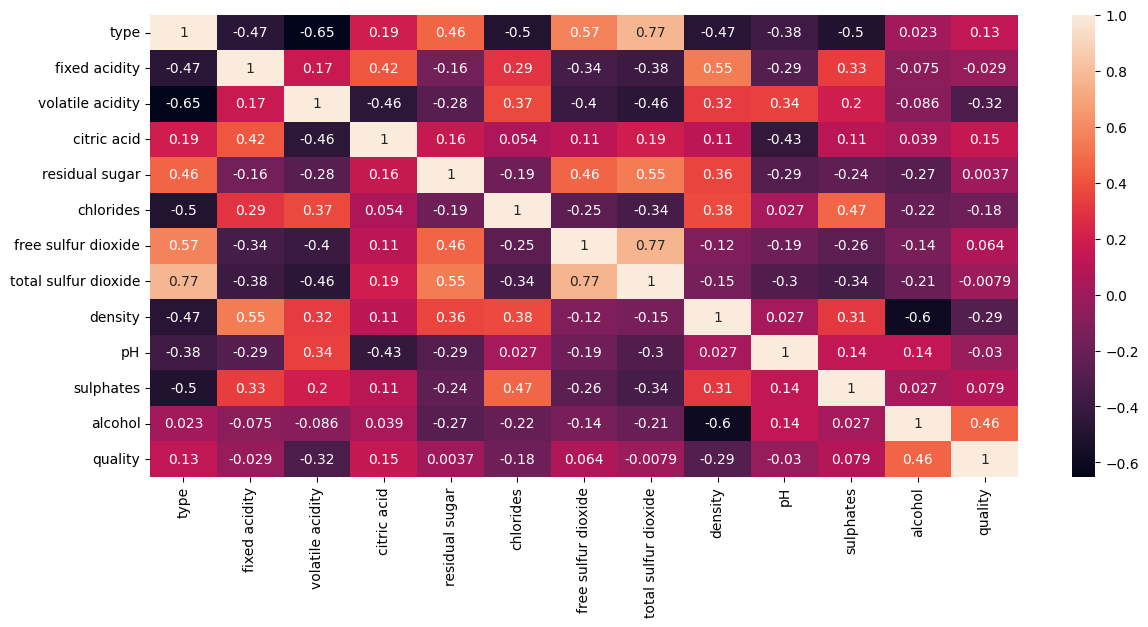

In [15]:
plt.figure(figsize =(14,6))
sns.heatmap(data= correlation, annot = True)
plt.show()

In [16]:
x = df.iloc[:,0:12].values
y = df.iloc[:,-1].values

In [17]:
x

array([[ 0.  ,  5.8 ,  0.29, ...,  3.39,  0.54, 13.5 ],
       [ 0.  ,  7.9 ,  0.2 , ...,  3.32,  0.8 , 11.9 ],
       [ 0.  ,  7.2 ,  0.62, ...,  3.51,  0.54,  9.5 ],
       ...,
       [ 1.  ,  6.5 ,  0.33, ...,  2.99,  0.46,  9.4 ],
       [ 1.  ,  5.5 ,  0.29, ...,  3.34,  0.38, 12.8 ],
       [ 1.  ,  6.  ,  0.21, ...,  3.26,  0.32, 11.8 ]])

In [18]:
y

array([6, 7, 5, ..., 6, 7, 6], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [21]:
rf = RandomForestClassifier()

In [22]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
y_pred_rf  = rf.predict(x_test)

In [24]:
print("Accuracy:",accuracy_score(y_test,y_pred_rf))

Accuracy: 0.8305546104117046


In [26]:
x1 = [[1,7,.27,.36,20.7,.04,45,170,1,3,.45,8.8]]

In [27]:
y1 = rf.predict(x1)
y1

array([6], dtype=int64)

In [28]:
import pickle

In [29]:
with open('wine_quality.pkl', 'wb') as file:
    pickle.dump(rf, file)